In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
df = pd.read_csv('trimmed_data.csv',index_col = 0)

## data set sorted according to the revenue

In [2]:
df = df.sort_values(by = ['revenue'],ascending=False)
df.head(5)


,title,genres,original_language,production_countries,release_date,runtime,popularity,vote_count,vote_average,budget,revenue
0,Avatar,"('Action', 'Adventure', 'Fantasy', 'Science Fi...",en,"('United Kingdom', 'United States of America')",2009-12-10,162.0,150.437577,11800,7.2,237000000,2787965087
31074,Star Wars: The Force Awakens,"('Action', 'Adventure', 'Fantasy', 'Science Fi...",en,"('United States of America',)",2015-12-15,136.0,31.626013,7993,7.5,245000000,2068223624
25,Titanic,"('Drama', 'Romance', 'Thriller')",en,"('United States of America',)",1997-11-18,194.0,100.025899,7562,7.5,200000000,1845034188
16,The Avengers,"('Action', 'Adventure', 'Science Fiction')",en,"('United States of America',)",2012-04-25,143.0,144.448633,11776,7.4,220000000,1519557910
28,Jurassic World,"('Action', 'Adventure', 'Science Fiction', 'Th...",en,"('United States of America',)",2015-06-09,124.0,418.708552,8662,6.5,150000000,1513528810


## Movie genres of the top 50 revenues

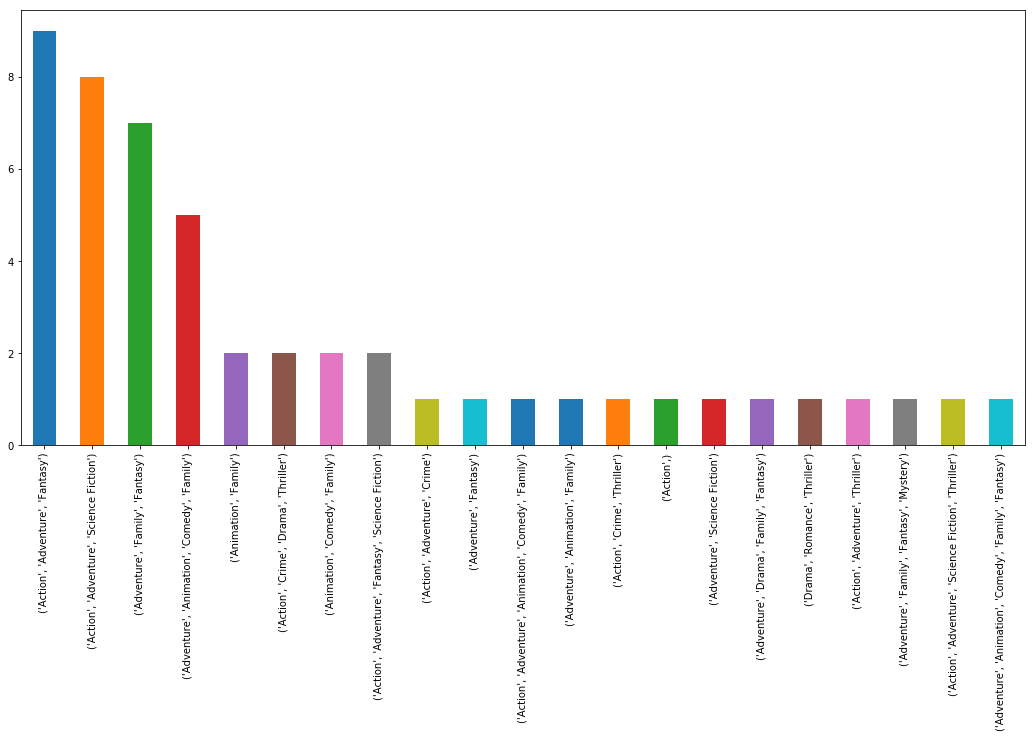

In [3]:
pd.value_counts(df.head(50)['genres']).plot.bar(figsize = (18, 8))
f1 = plt.gcf()

## Movie production countries from top 100 movie revenues

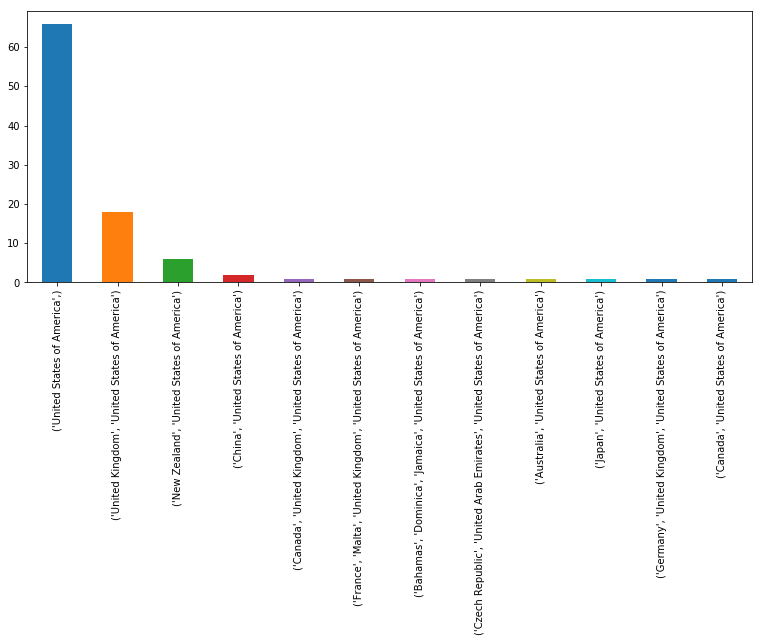

In [4]:
pd.value_counts(df.head(100)['production_countries']).plot.bar(figsize = (13, 5))
f1 = plt.gcf()

## Relation between the title length and revenue

In [5]:
lenth_rev = df[['title','revenue']]

In [6]:
lenth_rev['title'] = lenth_rev['title'].apply(len)

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
a1, b1 = np.polyfit(lenth_rev['title'], lenth_rev['revenue'], 1)
title_len = np.arange(0,80,dtype = 'float')
pred_rev = title_len * a1 + b1

Text(0, 0.5, 'revenue')

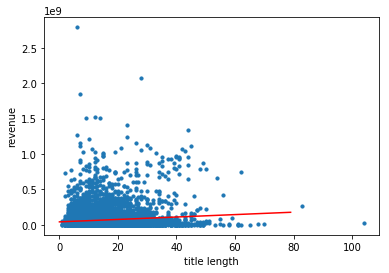

In [8]:
plt.scatter(x = lenth_rev['title'], y = lenth_rev['revenue'], s=10)
plt.plot(title_len, pred_rev, linestyle='-',color = "red")
plt.xlabel('title length')
plt.ylabel('revenue')

## Relation between the movie runtime and revenue

In [9]:
timelenth_rev = df[['runtime','revenue']]

Text(0, 0.5, 'revenue')

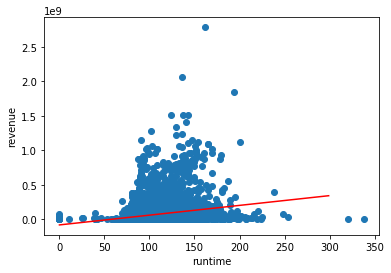

In [10]:
a, b = np.polyfit(timelenth_rev['runtime'], timelenth_rev['revenue'], 1)
time_len = np.arange(0,300,dtype = 'float')
pred_rev = a * time_len + b 
plt.scatter(x = timelenth_rev['runtime'], y = timelenth_rev['revenue'])
plt.plot(time_len, pred_rev, linestyle='-',color = "red")
plt.xlabel('runtime')
plt.ylabel('revenue')

## Movie release month of top 50 movie revenues


In [11]:
date_rev = df[['release_date','revenue']]
date_rev['release_date']=date_rev['release_date'].str[5:7]

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


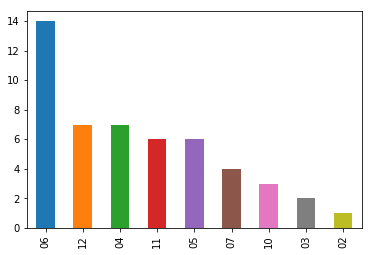

In [12]:
pd.value_counts(date_rev.head(50)['release_date']).plot.bar()
f1 = plt.gcf()

## Relation between the vote average and revenue

Text(0, 0.5, 'revenue')

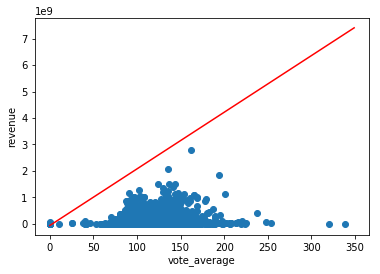

In [13]:
voteagv_rev = df[['vote_average','revenue']]
a, b = np.polyfit(voteagv_rev['vote_average'], voteagv_rev['revenue'], 1)
vot_average = np.arange(0,350,dtype = 'float')
pred_vote = a * vot_average + b
plt.scatter(x = timelenth_rev['runtime'], y = timelenth_rev['revenue'])
plt.plot(vot_average, pred_vote, linestyle='-',color = "red")
plt.xlabel('vote_average')
plt.ylabel('revenue')

## Relation between the budget and revenue


/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'revenue')

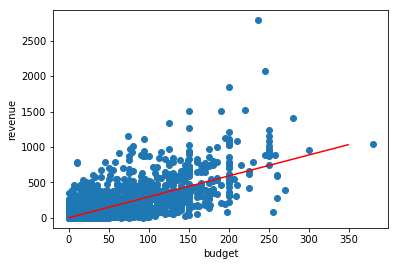

In [14]:
budget_rev = df[['budget','revenue']]
budget_rev['budget'] = budget_rev['budget']/1000000
budget_rev['revenue'] = budget_rev['revenue']/1000000
a, b = np.polyfit(budget_rev['budget'], budget_rev['revenue'], 1)
budget = np.arange(0,350,dtype = 'float')
pred_budget = a * budget + b
plt.scatter(x = budget_rev['budget'], y = budget_rev['revenue'])
plt.plot(budget, pred_budget, linestyle='-',color = "red")
plt.xlabel('budget')
plt.ylabel('revenue')

## Revenue Trend Over The Years

In [61]:
year_rev = df[['release_date','revenue']]
year_rev['release_date']=year_rev['release_date'].str[0:4]
year_rev['release_date'] = year_rev['release_date'].apply(int)

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
year = year_rev.groupby('release_date').mean()

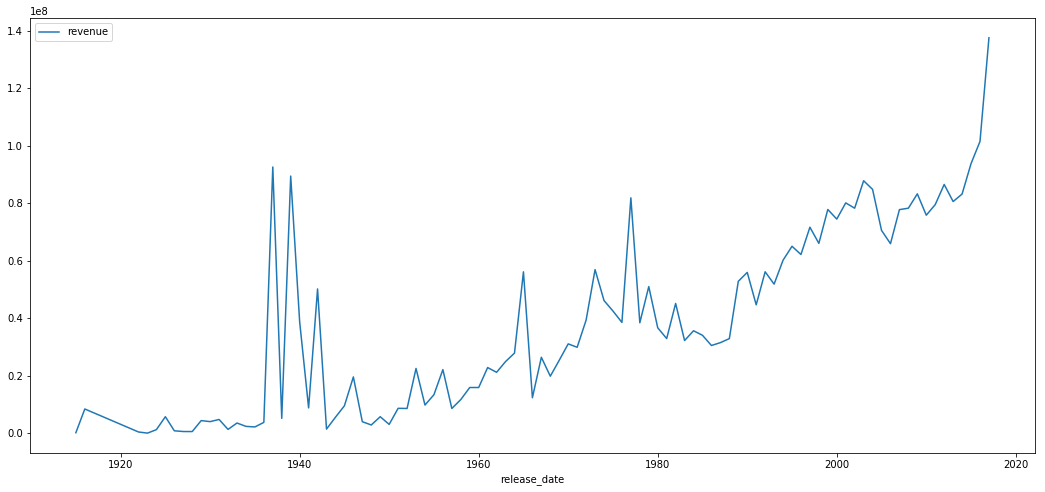

In [63]:
# year_rev.plot(figsize = (18, 8), xticks = 'release_date')
ax = year.plot(figsize = (18, 8))

In [64]:
year_rev

,release_date,revenue
0,2009,2787965087
31074,2015,2068223624
25,1997,1845034188
16,2012,1519557910
28,2015,1513528810
44,2015,1506249360
7,2015,1405403694
22138,2011,1342000000
124,2013,1274219009
47136,2017,1238764765


## Relation Of Popularity With Number Of Votes

In [47]:
# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname


In [70]:
year_rev['release_date'].max()

2017

In [66]:
pop_rev = df[['vote_count','revenue']]
pop_rev = cut_into_quantile(pop_rev, 'revenue')
pop_rev['year'] = year_rev['release_date']

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
pop_rev_2013 = pop_rev[pop_rev['year'] == 2013]
pop_rev_2014 = pop_rev[pop_rev['year'] == 2014]
pop_rev_2015 = pop_rev[pop_rev['year'] == 2015]
pop_rev_2016 = pop_rev[pop_rev['year'] == 2016]
pop_rev_2017 = pop_rev[pop_rev['year'] == 2017]
pop_rev_2017

,vote_count,revenue,revenue_levels,year
47136,3803,1238764765,High,2017
47848,2002,1020063384,High,2017
31085,4858,863416141,High,2017
37645,5025,820580447,High,2017
31079,2814,794191988,High,2017
48635,1440,604942143,High,2017
46094,3161,566652812,High,2017
48478,2712,519876949,High,2017
46152,2336,498814908,High,2017
46262,2341,378827494,High,2017


AttributeError: Unknown property rot

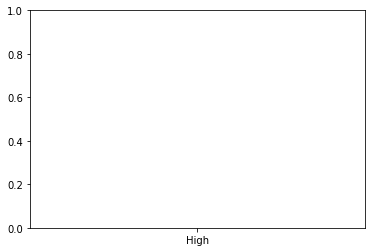

In [76]:
plt.bar(pop_rev_2013['revenue_levels'], pop_rev_2013['vote_count'], rot =0)
plt.bar(pop_rev_2014['revenue_levels'], pop_rev_2014['vote_count'],rot =0)
plt.bar(pop_rev_2015['revenue_levels'], pop_rev_2015['vote_count'], rot =0)
plt.bar(pop_rev_2016['revenue_levels'], pop_rev_2016['vote_count'], rot =0)
plt.bar(pop_rev_2017['revenue_levels'], pop_rev_2017['vote_count'], rot =0)
